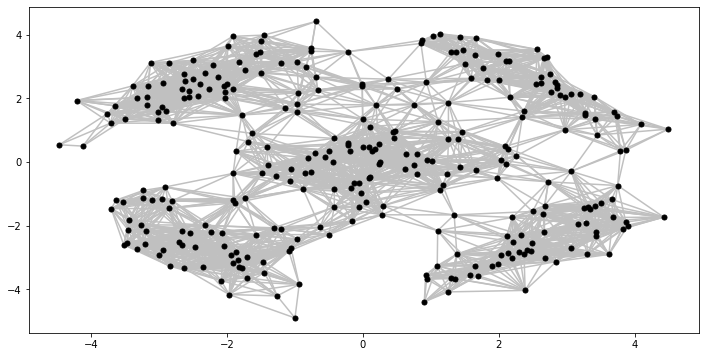

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 30 16:59:00 2021

@author: KEREM
"""

import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa

from scipy.stats import multivariate_normal # I used this to construct multivarate normal Gaussians from specific mean vector and covaraince matrix.
from numpy.linalg import eig

# Part 1: read the data given file:
X = np.genfromtxt("hw08_data_set.csv", delimiter = ",")
N = np.shape(X)[0]


# Part 2: Construct the B matrix:
    
def Euclidian_Distance(x1, x2):
    dist = np.sqrt( (x1[0] -x2[0])**2 + (x1[1] -x2[1])**2 )
    return dist


B =np.zeros((N,N))
S = 1.25

for i in range(N):
    for j in range(i+1,N):
        
        if Euclidian_Distance(X[i], X[j]) < S:
            B[i][j] = 1
            B[j][i] = 1
            
# Visualization Connectivity Matrix:

plt.figure(figsize = (12,6))

for i in range(N):
    for j in range(i+1,N):
        
        if B[i][j] == 1:
            x_values = [X[i,0], X[j,0]]
            y_values = [X[i,1], X[j,1] ]
            plt.plot(x_values,y_values, color ="#C0C0C0")
            
        
plt.plot(X[:, 0], X[:, 1], ".", markersize = 10, color ='black')   
plt.show()


#%%
# PART 3: Calculating D and normalized L matrix:

D = np.zeros((N,N))

for i in range(N):
    D[i,i] = sum(B[i,:])
    #print(D[i,i])

# Check D[i,i] is not zero for all i. If a diagonal is zero, that means there is a point which doesn't have any neighbor and D matrix is not invertible.
    if D[i,i] == 0:
        print(" Since the {}th diagonal of D is zero which means that there is a point without any neighbors, D is not invertible matrix.".format(i))

# For this project, we can see all diagonals of D is nonzero.

# Laplacian matrix:
L = D - B

D_invSqrt = np.zeros((N,N))

for i in range(N):
    D_invSqrt[i,i] = np.sqrt( 1 / D[i,i])
    
I = np.zeros((N,N))
for i in range(N):
    I[i,i] = 1

L_sym = I - np.matmul(D_invSqrt, np.matmul(B,D_invSqrt))


# PART 4: Eigenvectors:
R = 5
E, V = eig(L_sym)

# def norm(v):
#     n = np.shape(v)[0]
#     norm = 0
#     for i in range(n):
#         norm = norm + v[i]**2
#     return norm

# norms = np.zeros((N,1))
# for i in range(N):
#     norms[i] = norm(V[:,i])
    
index = np.argsort(E)[:R+1] # +1 because the smallest eigenvalue is zero should be ignored.

# construct Z matrix with eigenvalues which corresponds to 5 smallest eigenvalues.
Z = np.zeros((N,R))
for i in range(R):
    Z[:,i] =  V[index[i] ]


# PART 5: burda napcaz LA?
centroids = None
memberships = None
K = 5

def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        centroids = np.array([Z[29,0],Z[143,1],Z[204,2],Z[271,3],Z[277,4]])
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("x1")
    plt.ylabel("x2")

Iteration#1:


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

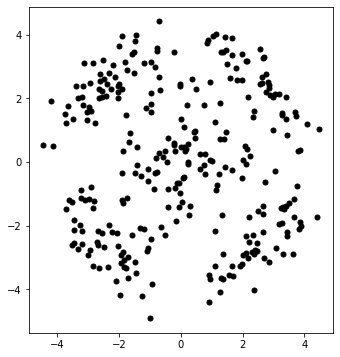

In [6]:
iteration = 1
while True:
    print("Iteration#{}:".format(iteration))

    old_centroids = centroids
    centroids = update_centroids(memberships, X)
    if np.alltrue(centroids == old_centroids):
        break
    else:
        plt.figure(figsize = (12, 6))    
        plt.subplot(1, 2, 1)
        plot_current_state(centroids, memberships, X)

    old_memberships = memberships
    memberships = update_memberships(centroids, X)
    if np.alltrue(memberships == old_memberships):
        plt.show()
        break
    else:
        plt.subplot(1, 2, 2)
        plot_current_state(centroids, memberships, X)
        plt.show()

    iteration = iteration + 1